In [18]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 70)
import warnings
warnings.filterwarnings('ignore')


In [19]:

df = pd.read_parquet('input/nps_data_full.parquet',engine='fastparquet')

In [20]:
df_1 = df[['FB_UID','WEEK_COMMENCING','STORE_LOCATIONCLASS','RATING_NPS','FB_SENTIMENT','FB_CHANNEL']]

In [21]:
df_1['WEEK_COMMENCING'] = pd.to_datetime(df_1['WEEK_COMMENCING'],yearfirst=True)

In [22]:
# Group by day and calculate NPS for each day
grouped_data = df_1.groupby(df_1['WEEK_COMMENCING'].dt.date)

# Initialize empty lists to store NPS scores for each day
nps_scores = []

# Loop through each day's data
for day, group in grouped_data:
    sample_size = group['FB_UID'].count()
    promoter = group[group['RATING_NPS'] >= 9]['FB_UID'].count()
    detractor = group[group['RATING_NPS'] <= 6]['FB_UID'].count()

    # Calculate NPS for the current day
    percentage_promoters = (promoter / sample_size) * 100
    percentage_detractors = (detractor / sample_size) * 100

    NPS = percentage_promoters - percentage_detractors

    # Store the NPS score and the corresponding date in a list
    nps_scores.append({'Date': day, 'NPS': NPS})

# Create a new DataFrame with NPS scores for each day
nps_df = pd.DataFrame(nps_scores)

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451591 entries, 0 to 451590
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FB_UID               451591 non-null  object        
 1   WEEK_COMMENCING      451591 non-null  datetime64[ns]
 2   STORE_LOCATIONCLASS  451591 non-null  object        
 3   RATING_NPS           450958 non-null  float64       
 4   FB_SENTIMENT         451591 non-null  object        
 5   FB_CHANNEL           451588 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 20.7+ MB


In [24]:
df_bar = pd.DataFrame(df_1['RATING_NPS'].value_counts()).reset_index()

In [25]:
df_bar

,RATING_NPS,count
0,10.0,247158
1,0.0,44477
2,9.0,39077
3,8.0,29398
4,5.0,22080
5,7.0,17454
6,6.0,11058
7,3.0,10701
8,1.0,10448
9,2.0,10422


<Axes: xlabel='RATING_NPS'>

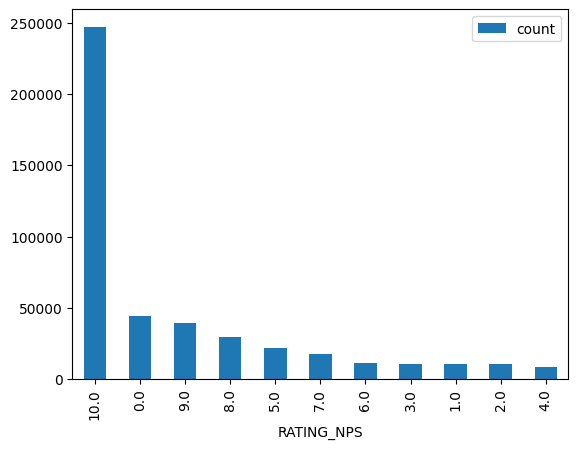

In [26]:
df_bar.plot.bar(x='RATING_NPS',y='count')